# KMeans

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files

In [2]:
# Load text data from the BBC directory and create a DataFrame with text and label columns.
DATA_DIR = "bbc\\"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=1000)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])
df.head(30)

,text,label
0,News Corp eyes video games market\n\nNews Corp...,0
1,Wasps 31-37 Leicester\n\nLeicester withstood a...,3
2,Looks and music to drive mobiles\n\nMobile pho...,4
3,'Errors' doomed first Dome sale\n\nThe initial...,2
4,Sculthorpe wants Lions captaincy\n\nPaul Scult...,3
5,Mobile gaming takes off in India\n\nGaming on ...,4
6,Watchdog probes e-mail deletions\n\nThe inform...,2
7,Edwards tips Idowu for Euro gold\n\nWorld outd...,3
8,Parmar ruled out of Davis Cup tie\n\nA knee in...,3
9,World tour for top video gamers\n\nTwo UK game...,4


In [3]:
df['label'].value_counts()

label
3    511
0    510
2    417
4    401
1    386
Name: count, dtype: int64

In [4]:
# Vectorize the text data using TF-IDF with English stop words and transform it into feature vectors.
vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

In [5]:
features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.02280016, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02459015, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [6]:
# Get the number of documents and the number of features (terms) in the TF-IDF matrix.
len(features.toarray()) , len(features.toarray()[0]) 

(2225, 29126)

In [7]:
# Perform MiniBatch KMeans clustering on the TF-IDF feature vectors with 5 clusters.
cls = MiniBatchKMeans(n_clusters=5, random_state=1000)
cls.fit(features)

c:\Users\pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=5, random_state=1000)

In [8]:
# predict cluster labels for new dataset
cls.predict(features)

array([1, 3, 4, ..., 4, 3, 3])

In [9]:
# to get cluster labels for the dataset used while
# training the model (used for models that does not
# support prediction on new dataset).
cls.labels_[:20]

array([1, 3, 4, 4, 3, 4, 2, 3, 3, 3, 2, 4, 4, 4, 3, 3, 1, 2, 4, 2])

In [10]:
cls.cluster_centers_

array([[0.00000000e+00, 1.41248599e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.02874642e-05, 8.16391071e-03, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.63754407e-04, 1.12128673e-02, 1.40920990e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.72173562e-05, 5.07158478e-03, 0.00000000e+00, ...,
        1.11393246e-04, 3.36655099e-04, 3.07551737e-04],
       [2.64058806e-04, 1.35342317e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [11]:
len(cls.cluster_centers_) , len(cls.cluster_centers_[0])

(5, 29126)

In [12]:
# reduce the features to 2D
pca = PCA(n_components=2, random_state=100)
reduced_features = pca.fit_transform(features.toarray())
reduced_features

array([[-0.04277219,  0.06662464],
       [-0.07835577, -0.13051088],
       [-0.07326799,  0.26373002],
       ...,
       [-0.05109815,  0.19521583],
       [-0.07536488, -0.04117384],
       [-0.04190159, -0.06617138]])

In [13]:
len(reduced_features) , len(reduced_features[0]) 

(2225, 2)

In [14]:
# reduce the cluster centers to 2D
reduced_cluster_centers = pca.transform(cls.cluster_centers_)
reduced_cluster_centers

array([[-0.01245664,  0.10976824],
       [-0.01554725,  0.08010199],
       [ 0.18362331, -0.03143713],
       [-0.06588057, -0.07366743],
       [-0.00651741,  0.06531885]])

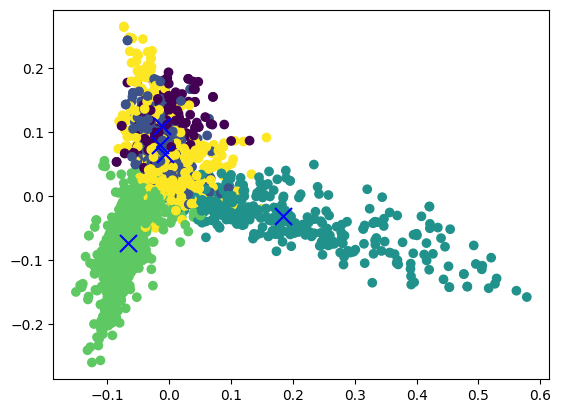

In [15]:
# Plot the clustered data points and the cluster centers in a 2D space.
plt.scatter(reduced_features[:,0], reduced_features[:,1], c=cls.predict(features))
plt.scatter(reduced_cluster_centers[:, 0], reduced_cluster_centers[:,1], marker='x', s=150, c='b')

In [16]:
# Evaluate clustering performance using homogeneity, completeness, V-measure, and adjusted Rand index.
from sklearn import metrics
print("Homogeneity: %0.3f" % metrics.homogeneity_score(df.label, cls.predict(features)))
print("Completeness: %0.3f" % metrics.completeness_score(df.label, cls.predict(features)))
print("V-measure: %0.3f" % metrics.v_measure_score(df.label, cls.predict(features)))
print("Adjusted Rand-Index: %.3f"% metrics.adjusted_rand_score(df.label, cls.predict(features)))

Homogeneity: 0.487
Completeness: 0.532
V-measure: 0.509
Adjusted Rand-Index: 0.403


In [17]:
# Predict the cluster assignments for the given text samples: 'president' and 'game'.
cls.predict(vec.transform(['president']))

array([4])

In [18]:
cls.predict(vec.transform(['game']))

array([3])

## ِClarans

In [19]:
import pandas as pd
from pyclustering.cluster.clarans import clarans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.datasets import load_files
from pyclustering.utils import timedcall

DATA_DIR = "bbc/"
data = load_files(DATA_DIR, encoding="utf-8", decode_error="replace", random_state=10)
df = pd.DataFrame(list(zip(data['data'], data['target'])), columns=['text', 'label'])

vec = TfidfVectorizer(stop_words="english")
vec.fit(df.text.values)
features = vec.transform(df.text.values)

# Number of clusters
num_clusters = 5

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=100)
reduced_features = pca.fit_transform(features.toarray())


In [20]:
# Convert reduced features to a list, apply CLARANS clustering, and measure execution time.
text_data_list = reduced_features.tolist()

clarans_obj = clarans(text_data_list, num_clusters, 3, 5)

# Call the clarans method 'process' to implement the algorithm
(tks, res) = timedcall(clarans_obj.process)
print("Execution time : ", tks, "\n")


clst = clarans_obj.get_clusters()

med = clarans_obj.get_medoids()


Execution time :  45.344884499907494 



In [21]:
len(clst), len(med)

(5, 5)

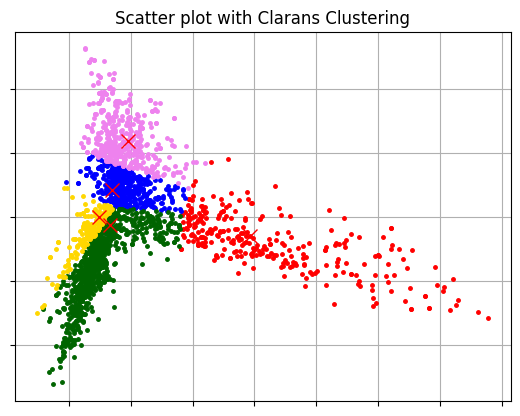

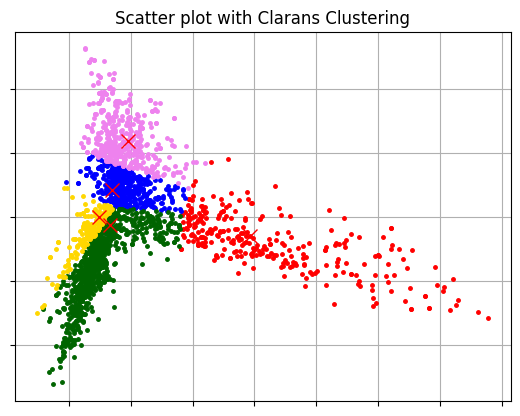

In [22]:
from pyclustering.cluster import cluster_visualizer

# Create a cluster_visualizer object
visualizer = cluster_visualizer()

# Add points and clusters to the visualizer
visualizer.append_clusters(clst, reduced_features, markersize=5)
visualizer.append_cluster(med, reduced_features, marker='x', markersize=10, color='red')
visualizer.set_canvas_title('Scatter plot with Clarans Clustering')
# Show the visualization
visualizer.show()


In [23]:
# Convert res to 1D array
# Flatten the list of lists to a 1D array
res_1d = np.concatenate(clst)

homogeneity = metrics.homogeneity_score(df.label, res_1d)
completeness = metrics.completeness_score(df.label, res_1d)
v_measure = metrics.v_measure_score(df.label, res_1d)
adjusted_rand_index = metrics.adjusted_rand_score(df.label, res_1d)

# Print the results
print("Homogeneity: %0.3f" % homogeneity)
print("Completeness: %0.3f" % completeness)
print("V-measure: %0.3f" % v_measure)
print("Adjusted Rand-Index: %.3f" % adjusted_rand_index)

Homogeneity: 1.000
Completeness: 0.208
V-measure: 0.344
Adjusted Rand-Index: 0.000
